In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names_train = []
file_names_test = []
file_names_valid=  []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if "valid" in os.path.join(dirname,filename):
            file_names_valid.append(os.path.join(dirname,filename))
        if "train" in os.path.join(dirname,filename):
            file_names_train.append(os.path.join(dirname,filename))

        if  "test" in os.path.join(dirname,filename):
            file_names_test.append(os.path.join(dirname,filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/updated_baseline/keras/default/1/baseline_unet_model1.keras
/kaggle/input/baseline_unet_model/keras/default/1/baseline_unet_model.keras
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/README.txt
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/1569_jpg.rf.dc675613d5fce07e505cba269b91fffb.jpg
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/1345_jpg.rf.54fa804d2c5aa5ee150120987469bc56.jpg
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/2578_jpg.rf.d050cac989e96e1beb221b4b22b93e82.jpg
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/1097_jpg.rf.df6c35b4ed24ef8c28138939567ef7ab.jpg
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/2145_jpg.rf.04fd7a826343eea802b676b730f12ae3.jpg
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/2061_jpg.rf.d04d5d6171939764f6e239a960e95e02.jpg
/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/2776_jp

In [2]:
print(len(file_names_train))
print(len(file_names_test))
print(len(file_names_valid))

1503
216
430


In [3]:
l = [file for file in file_names_train if "json" in file]
print(l)

['/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/train/_annotations.coco.json']


In [4]:
l1 = [file for file in file_names_test if "json" in file]
print(l1)


['/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/test/_annotations.coco.json']


In [5]:
l2 = [file for file in file_names_valid if "json" in file]
print(l2)

['/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/_annotations.coco.json']


In [6]:
import json
import csv

# Load the COCO-style JSON file
with open('/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/train/_annotations.coco.json', 'r') as f:
    data = json.load(f)

# Create a mapping from image_id to file_name
image_id_to_filename = {img['id']: img['file_name'] for img in data['images']}

# Open a CSV file to write
with open('annotations.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['image_id', 'file_name', 'category_id', 'bbox'])

    # Write each annotation
    for ann in data['annotations']:
        image_id = ann['image_id']
        file_name = image_id_to_filename.get(image_id, "unknown")
        category_id = ann['category_id']
        bbox = json.dumps(ann['bbox'])  # <-- Convert list to JSON string

        writer.writerow([image_id, file_name, category_id, bbox])


In [7]:
import pandas as pd
import json

df = pd.read_csv('annotations.csv')
df['bbox'] = df['bbox'].apply(json.loads)  # convert JSON string back to list

df

,image_id,file_name,category_id,bbox
0,0,2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg,1,"[145, 239, 168.75, 162.5]"
1,1,2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg,1,"[194, 176, 148.75, 233.75]"
2,2,2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg,1,"[133, 173, 162.5, 185]"
3,3,2777_jpg.rf.3b60ea7f7e70552e70e41528052018bd.jpg,1,"[245, 358, 138.75, 166.25]"
4,4,2860_jpg.rf.3bb87fa4f938af5abfb1e17676ec1dad.jpg,1,"[80, 189, 112.5, 132.5]"
...,...,...,...,...
1497,1497,1365_jpg.rf.fe6ceef68f802f62e68bfe86cbedf4c0.jpg,2,"[194, 264, 106.25, 122.5]"
1498,1498,2242_jpg.rf.ffaeadc4d4d6b67d5829ab30c8919708.jpg,1,"[145, 305, 146.25, 145]"
1499,1499,2636_jpg.rf.ff6b7cbc4a4de3f93d813f6a7c04b4a8.jpg,1,"[274, 133, 163.75, 173.75]"
1500,1500,147_jpg.rf.ff993da0adbed8883db143202e8c0e6e.jpg,2,"[164, 311, 221.25, 213.75]"


In [8]:
import json
import csv

# Load the COCO-style JSON file
with open('/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/test/_annotations.coco.json', 'r') as f:
    data = json.load(f)

# Create a mapping from image_id to file_name
image_id_to_filename = {img['id']: img['file_name'] for img in data['images']}

# Open a CSV file to write
with open('annotations.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['image_id', 'file_name', 'category_id', 'bbox'])

    # Write each annotation
    for ann in data['annotations']:
        image_id = ann['image_id']
        file_name = image_id_to_filename.get(image_id, "unknown")
        category_id = ann['category_id']
        bbox = json.dumps(ann['bbox'])  # <-- Convert list to JSON string

        writer.writerow([image_id, file_name, category_id, bbox])


In [9]:
import pandas as pd
import json

df_test = pd.read_csv('annotations.csv')
df_test['bbox'] = df_test['bbox'].apply(json.loads)  # convert JSON string back to list

df_test

,image_id,file_name,category_id,bbox
0,0,1706_jpg.rf.004b87f63425ef145855aab826e33eee.jpg,2,"[324, 231, 111.25, 76.25]"
1,1,1363_jpg.rf.01c4537b57f360820b9e00c7e0c99ae1.jpg,2,"[196, 275, 112.5, 106.25]"
2,2,1136_jpg.rf.02df64849485272e48139498c36c8e44.jpg,2,"[256, 275, 93.75, 92.5]"
3,3,2210_jpg.rf.039c38182fe783c69dd28160e5ef02a0.jpg,1,"[226, 270, 186.25, 151.25]"
4,4,2058_jpg.rf.04e8e79db0fbf2459585ce3954f50739.jpg,1,"[253, 275, 36.25, 37.5]"
...,...,...,...,...
210,210,2456_jpg.rf.fbc4e1bf546033f504b0adbf5959bb50.jpg,1,"[180, 251, 227.5, 201.25]"
211,211,1361_jpg.rf.d77d067dfc6aa94df76a98a34bea8ed5.jpg,2,"[203, 275, 95, 115]"
212,212,1058_jpg.rf.f6d6dcde9564c091b30eb6873641ba36.jpg,2,"[353, 276, 71.25, 76.25]"
213,213,2817_jpg.rf.eeb513c4ab3414fdda2bbba660318b57.jpg,1,"[158, 386, 123.75, 143.75]"


In [10]:
import json
import csv

# Load the COCO-style JSON file
with open('/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/_annotations.coco.json', 'r') as f:
    data = json.load(f)

# Create a mapping from image_id to file_name
image_id_to_filename = {img['id']: img['file_name'] for img in data['images']}

# Open a CSV file to write
with open('annotations.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['image_id', 'file_name', 'category_id', 'bbox'])

    # Write each annotation
    for ann in data['annotations']:
        image_id = ann['image_id']
        file_name = image_id_to_filename.get(image_id, "unknown")
        category_id = ann['category_id']
        bbox = json.dumps(ann['bbox'])  # <-- Convert list to JSON string

        writer.writerow([image_id, file_name, category_id, bbox])


In [11]:
import pandas as pd
import json

df_valid = pd.read_csv('annotations.csv')
df_valid['bbox'] = df_valid['bbox'].apply(json.loads)  # convert JSON string back to list

df_valid

,image_id,file_name,category_id,bbox
0,0,1997_jpg.rf.57e306420710246d04c0d5c26e6496c6.jpg,1,"[116, 300, 102.5, 143.75]"
1,1,2422_jpg.rf.59a35b6d8d2eed150af8535cf09bbde5.jpg,1,"[235, 326, 145, 148.75]"
2,2,1630_jpg.rf.5afc6e25d7987503a11bcb0791b60b53.jpg,2,"[291, 245, 118.75, 115]"
3,3,1330_jpg.rf.5b23bf18a29b0f50e376b19a5a84f823.jpg,2,"[223, 284, 73.75, 72.5]"
4,4,2768_jpg.rf.5b87c0023909e0789a33185a3aab92e9.jpg,1,"[203, 161, 182.5, 362.5]"
...,...,...,...,...
424,424,1354_jpg.rf.4a078d462ede36068739118b2d968a1f.jpg,2,"[176, 256, 127.5, 137.5]"
425,425,1586_jpg.rf.4e2cf76cc42f6711382eb3017983b1c2.jpg,2,"[310, 250, 130, 130]"
426,426,1333_jpg.rf.4fee0c6d3a344f601218e6034b87c3bc.jpg,2,"[214, 286, 81.25, 73.75]"
427,427,2040_jpg.rf.559e217f8816b23664e70315f8b38314.jpg,1,"[145, 325, 178.75, 171.25]"


/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/train/2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg
(640, 640, 3)


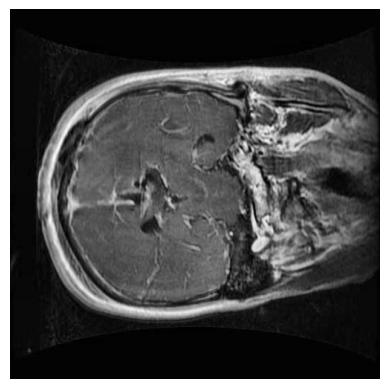

In [12]:
#lets plot a image 
import matplotlib.pyplot as plt

m ="/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/train/"+ df["file_name"][0]
print(m)

m1 = plt.imread(m)
plt.imshow(m1)
plt.plot()
plt.axis("off")
print(m1.shape)


In [13]:
def image_file(csv_files):
    return_numpy =[]
    for i in range(len(csv_files['bbox'])):
        l = "/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/train/"+csv_files['file_name'][i]
        numpy_array = plt.imread(l)
        return_numpy.append(numpy_array)
    return return_numpy

def image_file1(csv_files):
    return_numpy =[]
    for i in range(len(csv_files['bbox'])):
        l = "/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/test/"+csv_files['file_name'][i]
        numpy_array = plt.imread(l)
        return_numpy.append(numpy_array)
    return return_numpy

def image_file2(csv_files):
    return_numpy =[]
    for i in range(len(csv_files['bbox'])):
        l = "/kaggle/input/brain-tumor-image-dataset-semantic-segmentation/valid/"+csv_files['file_name'][i]
        numpy_array = plt.imread(l)
        return_numpy.append(numpy_array)
    return return_numpy

image_numpy_array_train = image_file(df)
image_numpy_array_train = np.asarray(image_numpy_array_train)

image_numpy_array_test = image_file1(df_test)
image_numpy_array_test = np.asarray(image_numpy_array_test)

image_numpy_array_valid = image_file2(df_valid)
image_numpy_array_valid = np.asarray(image_numpy_array_valid)

print(image_numpy_array_train.shape)
print(image_numpy_array_train[0].shape)
print(image_numpy_array_test.shape)
print(image_numpy_array_test[0].shape)
print(image_numpy_array_valid.shape)
print(image_numpy_array_valid[0].shape)
        

(1502, 640, 640, 3)
(640, 640, 3)
(215, 640, 640, 3)
(640, 640, 3)
(429, 640, 640, 3)
(640, 640, 3)


In [14]:
#[1,9] for tumour
#[0,1] for non tumour
print(len(df['bbox'][0]))

4


In [14]:
## here we try to prepare the data by converting the image into a 2 dimensional image
#which contains the one hot encoded vector since there are 2 classes , we 
import math
def  convert_image_to_semantic_map(input_csv_file):
    semantic_mapping = []
    for i in range(len(input_csv_file['bbox'])):
        zero_matrix = np.zeros((640,640,1),dtype = np.uint8)
        l = list(input_csv_file['bbox'][i])
        for i in range(l[0],math.ceil(l[0]+l[2])):
            for j in range(l[1],math.ceil(l[1]+l[3])):
                zero_matrix[i,j] =1
        
        semantic_mapping.append(zero_matrix)

    return semantic_mapping
 
semantic_maps_train = convert_image_to_semantic_map(df)
semantic_maps_train = np.asarray(semantic_maps_train)


semantic_maps_test = convert_image_to_semantic_map(df_test)
semantic_maps_test = np.asarray(semantic_maps_test)

semantic_maps_valid = convert_image_to_semantic_map(df_valid)
semantic_maps_valid = np.asarray(semantic_maps_valid)

print(semantic_maps_train.shape)
print(semantic_maps_test.shape)
print(semantic_maps_valid.shape)

(1502, 640, 640, 1)
(215, 640, 640, 1)
(429, 640, 640, 1)


In [15]:
#now we have the original image and the corresponding semantic map
#Now lets create the baseline unet model 

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, 
    Dense, Concatenate, Input, Multiply
)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
from tensorflow.keras.initializers import HeNormal





2025-04-24 14:12:14.761191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745503934.985315      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745503935.050506      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
#now first lets create the baseline unet model 
def convolution_block(previous_layer, number_of_filters):
    CONV_1 = Conv2D(number_of_filters,padding = "same",activation = "relu", kernel_size = (3,3))(previous_layer)
    CONV_2 = Conv2D(number_of_filters, padding = "same", activation = "relu", kernel_size = (3,3))(CONV_1)

    return CONV_2

input = Input((640,640,3))
#now we pass it through a layer of convolution layers 
input_conv = Conv2D(16,(3,3),activation = 'relu',padding = 'same',kernel_initializer = HeNormal())(input)
k_1 = convolution_block(input_conv,16)
maxpool_layer = MaxPooling2D()(k_1)
k_2 = convolution_block(maxpool_layer,32)
maxpool_layer2 = MaxPooling2D()(k_2)
k_3 = convolution_block(maxpool_layer2,64)
maxpool_layer3 = MaxPooling2D()(k_3)
k_4  = convolution_block(maxpool_layer3, 128)
#now i have coded the  encoder layer of the unet , now lets try to code the decoder layer of the unet mode 
k_5  = convolution_block(k_4,64)
upsample_1 = UpSampling2D((2,2))(k_5)
concatenate = Concatenate()([upsample_1,k_3])
k_6 = convolution_block(concatenate,64)
upsample_2 = UpSampling2D((2,2))(k_6)
convolution = Conv2D(32,(3,3),padding = "same", activation = "relu")(upsample_2)
k_7 = Concatenate()([convolution,k_2])
k_8 = convolution_block(k_7,32)

upsample_2 = UpSampling2D((2,2))(k_8)
k_9 = Conv2D(5,(3,3), padding = "same", activation = "relu")(upsample_2)
k_10 = Concatenate()([k_9,k_1])
k_12 = convolution_block(k_10 ,3)
k_13 = Conv2D(1,(1,1), activation = "sigmoid", padding = "same")(k_12)


#now lets wrap the model 
baseline_unet_model = Model(inputs = input, outputs = k_13)
baseline_unet_model.summary()






I0000 00:00:1745503953.752020      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745503953.752719      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 640, 640, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 640, 640, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 640, 640, 16)   │          2,320 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 640, 640, 16)   │          2,320 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 320, 320, 16)   │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 320, 320, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 320, 320, 32)   │          9,248 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 160, 160, 32)   │              0 │ conv2d_4[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 160, 160, 64)   │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 160, 160, 64)   │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 80, 80, 64)     │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 80, 80, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 80, 80, 128)    │        147,584 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 80, 80, 64)     │         73,792 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 80, 80, 64)     │         36,928 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 160, 160, 64)   │              0 │ conv2d_10[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 160, 160, 128)  │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_6[0][0]         │
├──────────────────────

 Total params: 565,559 (2.16 MB)

 Trainable params: 565,559 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#now we have denormalized the image . 
#next we now try to build the unet model , infused with attention 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda

from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, 
    Dense, Concatenate, Input, Multiply
)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model

class TeacherNetwork:
    def __init__(self, weight, reduction_amount):
        self.activation = "relu"
        self.padding = "same"
        self.kernel_size = (3, 3)
        self.weight = weight  # Importance given to avg pooling
        self.reduction_amount = reduction_amount

    def encoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(output1)
        batchnorm4 = BatchNormalization()(output2)
        maxpool_layer = MaxPooling2D()(batchnorm4)
        return output2, maxpool_layer

    def decoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        batchnorm3= BatchNormalization()(output1)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(batchnorm3)
        upsample_layer = UpSampling2D(size=(2,2), interpolation="nearest")(output2)
        return upsample_layer
    def channel_attention_layer(self, input_tensor, filters):
        pooled_tensor = MaxPooling2D()(input_tensor)
        avg_pool = GlobalAveragePooling2D()(pooled_tensor)

        avg_pool1 = AveragePooling2D((2, 2))(input_tensor)
        avg_pool2 = GlobalAveragePooling2D()(avg_pool1)

    # First branch
        dense_layer = Dense(filters, activation="relu")(avg_pool)
        dense_layer1 = Dense(filters // 2, activation="relu")(dense_layer)
        dense_layer2 = Dense(filters, activation="relu")(dense_layer1)

    # Second branch
        dense_layer3 = Dense(filters, activation="relu")(avg_pool2)
        dense_layer4 = Dense(filters // 2, activation="relu")(dense_layer3)
        dense_layer5 = Dense(filters, activation="relu")(dense_layer4)

    # Concatenate and final squeeze
        concatenate_layer = Concatenate(axis=-1)([dense_layer2, dense_layer5])
        dense_layer6 = Dense(filters, activation="sigmoid")(concatenate_layer)

    # ✅ Corrected reshape
        attention = tf.keras.layers.Reshape((1, 1, filters))(dense_layer6)
        output_filters = input_tensor * attention
        return output_filters


    def spatial_attention_layer(self, input_tensor, filters):
        input_tensor1 = self.channel_attention_layer(input_tensor, filters)

        maxpool_tensor = MaxPooling2D((2, 2))(input_tensor1)
        average_tensor = AveragePooling2D((2, 2))(input_tensor1)

        # Adjust importance
        average_tensor = self.weight * average_tensor
        maxpool_tensor = (1 - self.weight) * maxpool_tensor

        concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
        convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu",kernel_initializer =  HeNormal())(concatenated_filters)
        batchnorm5 = BatchNormalization()(convolution_filter)
        convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
        batchnorm6 = BatchNormalization()(convolution_filter2)

        upsampled_filter = UpSampling2D((2,2))(batchnorm6)
        spatial_filter= input_tensor1*upsampled_filter
        return spatial_filter

    def attention_block(self, input_tensor, filters):
        return self.spatial_attention_layer(input_tensor, filters)

    def build_model(self, input_shape):
        inputs = Input(shape=input_shape)
        input_conv = Conv2D(16,(3,3),padding = "same",activation ="relu" , kernel_initializer = HeNormal())(inputs)
        
        enc1, pool1 = self.encoder_layer(16, input_conv)
        enc2, pool2 = self.encoder_layer(32, pool1)
        enc3, pool3 = self.encoder_layer(32, pool2)
        enc4, _ = self.encoder_layer(64, pool3)

        att1 = self.attention_block(enc1, 16)
        att2 = self.attention_block(enc2, 32)
        att3 = self.attention_block(enc3, 32)

        dec6 = self.decoder_layer(64, enc4)
        concat5 = Concatenate(axis=-1)([att3, dec6])
        dec5 = self.decoder_layer(32, concat5)

        concat4 = Concatenate(axis=-1)([att2, dec5])
        dec4 = self.decoder_layer(32, concat4)

        concat3 = Concatenate(axis=-1)([att1, dec4])
        dec3 = self.decoder_layer(16, concat3)

        maxpool_layer = MaxPooling2D()(dec3)

        concat1 = Concatenate(axis=-1)([att1, maxpool_layer])
        batchnorm11 = BatchNormalization()(concat1)
        output_tensor1 = Conv2D(10, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)
        batchnorm12 = BatchNormalization()(output_tensor1)
        output_tensor3 = Conv2D(5,(3,3),activation = self.activation,padding = self.padding)(batchnorm12)
        output_tensor2 = Conv2D(1, (1, 1), activation="sigmoid", padding=self.padding)(output_tensor3)
        

        #output_tensor3 = Lambda(lambda x: tf.squeeze(x, axis=-1))(output_tensor2)


        return Model(inputs, output_tensor2)

In [18]:
#after creating the class , lets now create an object 
teacher_unet = TeacherNetwork(0.5,2)
teacher_model = teacher_unet.build_model((640,640,3))
teacher_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 640, 640, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 640, 640, 16)   │            448 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 640, 640, 16)   │          2,320 │ conv2d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 640, 640, 16)   │          2,320 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 640, 640, 16)   │             64 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 320, 320, 16)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 320, 320, 32)   │          4,640 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 320, 320, 32)   │          9,248 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 320, 320, 32)   │            128 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 160, 160, 32)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 160, 160, 32)   │          9,248 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 160, 160, 32)   │          9,248 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 80, 80, 32)     │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_4       │ (None, 80, 80, 32)     │              0 │ conv2d_26[0][0]        │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ max_pooling2d_11[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_poolin

 Total params: 301,966 (1.15 MB)

 Trainable params: 301,268 (1.15 MB)

 Non-trainable params: 698 (2.73 KB)

In [19]:

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanIoU


def dice_score(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true,tf.float32)
    y_pred = tf.cast(y_pred,tf.float32)
    
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)



In [20]:
#Now we have created the test train and the valid set
#we now compile the model 
from tensorflow.keras.optimizers import Adam
teacher_model.compile(metrics = [dice_score],optimizer = Adam(learning_rate =0.0001),loss ="binary_crossentropy")
baseline_unet_model.compile(metrics = [dice_score],optimizer = Adam(learning_rate =0.0001),loss ="binary_crossentropy")


In [22]:
print(image_numpy_array_valid.shape)
print(semantic_maps_valid.shape)

(429, 640, 640, 3)
(429, 640, 640)


In [28]:
history = baseline_unet_model.fit(image_numpy_array_train,semantic_maps_train,validation_data = (image_numpy_array_valid,semantic_maps_valid),epochs = 30 , verbose = 1,batch_size = 7  )

KeyboardInterrupt: 

In [21]:
history1 = teacher_model.fit(image_numpy_array_train,semantic_maps_train,validation_data = (image_numpy_array_valid,semantic_maps_valid),epochs = 50 , verbose = 1,batch_size = 5  )

Epoch 1/50


I0000 00:00:1745504051.567398      81 service.cc:148] XLA service 0x7cc5b4004390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745504051.568310      81 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745504051.568333      81 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745504054.354886      81 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745504088.550903      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


301/301 ━━━━━━━━━━━━━━━━━━━━ 230s 550ms/step - dice_score: 0.0653 - loss: 0.7527 - val_dice_score: 0.0629 - val_loss: 0.6156
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 118s 392ms/step - dice_score: 0.0563 - loss: 0.5587 - val_dice_score: 0.0626 - val_loss: 0.4659
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 118s 391ms/step - dice_score: 0.0813 - loss: 0.4242 - val_dice_score: 0.1149 - val_loss: 0.2979
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 117s 390ms/step - dice_score: 0.1149 - loss: 0.3097 - val_dice_score: 0.1210 - val_loss: 0.2012
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 118s 390ms/step - dice_score: 0.1310 - loss: 0.2424 - val_dice_score: 0.1554 - val_loss: 0.1688
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 118s 391ms/step - dice_score: 0.1437 - loss: 0.2008 - val_dice_score: 0.1479 - val_loss: 0.1592
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 118s 391ms/step - dice_score: 0.1561 - loss: 0.1736 - val_dice_score: 0.1282 - val_loss: 0.1469
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 118s 391ms/step - d

In [ ]:
#now lets save the model

baseline_unet_model.save('/kaggle/working/baseline_unet_model1.keras')



In [26]:
teacher_model.save("/kaggle/working/teacher_modelv3.keras")

In [29]:
#now lets load  the model 
from tensorflow.keras.models import load_model
from keras import config as keras_config

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanIoU

def dice_score(y_true, y_pred):
    y_true = tf.cast(y_true,tf.float32)
    y_pred = tf.cast(y_pred,tf.float32)
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)

    
    intersection = K.sum(y_true_f * y_pred_f)
    return (2*intersection + 0.000001) / (K.sum(y_true_f) + K.sum(y_pred_f) + 0.00001)





teacher_model = load_model("/kaggle/input/teacher_model_v3/keras/default/1/teacher_modelv3.keras",
                           custom_objects={"dice_metric": dice_score})


TypeError: Could not locate function 'dice_score'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'dice_score', 'registered_name': 'function'}

In [ ]:
#now lets plot some predictions 
import matplotlib.pyplot as plt

# Extract values
acc = history.history['iou_metric']
val_acc = history.history['val_iou_metric']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract values
acc = history1.history['iou_metric']
val_acc = history1.history['val_iou_metric']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#now lets plot some predictions of the model 
for i in range(10,20):
    k = image_numpy_array_test[i]
    k = np.expand_dims(k,axis = 0)
    seamntic_map_original = semantic_maps_test[i]
    #we get the predictions from the baseline unet model and the teacher model 
    prediction_baseline = baseline_unet_model.predict(k)
    prediction_teacher = teacher_model.predict(k)
    print(len(prediction_teacher[0]))
    #now after getting the predictions , we need to squeeze the dimension
    prediction_baseline = np.asarray(prediction_baseline)
    prediction_teacher1 = np.asarray(prediction_teacher[0])
    
    prediction_baseline = prediction_baseline.squeeze()

    #here we need to plot the diagram 
    # Plotting both predictions side by side
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(prediction_baseline, cmap='gray')
    plt.title("Baseline Prediction")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(seamntic_map_original, cmap='gray')
    plt.title("Original Prediction")
    plt.axis('off')

    plt.suptitle(f"Prediction Comparison - Sample {i+1}")
    plt.tight_layout()
    plt.show()

In [ ]:
teacher_model.summary()

In [ ]:
from keras.utils import plot_model 
plot_model(teacher_model , show_layer_names = True)

In [ ]:
for layer in teacher_model.layers:
    if layer == "multiply_102":
        print("yes")


In [ ]:
baseline_unet_model.summary

In [ ]:
if "multiply_102" in teacher_model.layers():
    print("yes")

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def convolution_block(number_of_filters,previous_layer):
    conv_1= Conv2D(number_of_filters,(3,3),padding = "same", activation = "relu")(previous_layer)
    conv_2 = Conv2D(number_of_filters,(3,3),padding = "same",activation = "relu")(conv_1)
    return conv_2

def channel_attention_mechanism(starting_layer,filters):
    pooled_tensor = MaxPooling2D()(starting_layer)
    avg_pool = GlobalAveragePooling2D()(pooled_tensor)

        
    avg_pool1= AveragePooling2D((2,2))(starting_layer)

    avg_pool2 = GlobalAveragePooling2D()(avg_pool1)


    dense_layer = Dense(filters, activation="relu")(avg_pool)
    dense_layer1 = Dense(filters // 2, activation="relu")(dense_layer)
    dense_layer2 = Dense(filters, activation="relu")(dense_layer1)


    dense_layer3 = Dense(filters, activation="relu")(avg_pool2)
    dense_layer4 = Dense(filters // 2, activation="relu")(dense_layer3)
    dense_layer5 = Dense(filters, activation="relu")(dense_layer4)

        #now i concatenate the output of the two 
    concatenate_layer = Concatenate(axis = -1)([dense_layer2,dense_layer5])

    dense_layer6 = Dense(filters, activation = "sigmoid")(concatenate_layer)

    dense_layer7 = tf.keras.layers.Reshape((1, 1, filters))(dense_layer6)
        
    output_filters = Multiply()([starting_layer, dense_layer7])
    return output_filters

def spatial_attention_mechanism(starting_layers,filters):
    input_tensor1 = channel_attention_mechanism(starting_layers,filters)

    maxpool_tensor = MaxPooling2D((2, 2))(input_tensor1)
    average_tensor = AveragePooling2D((2, 2))(input_tensor1)


    concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
    convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu")(concatenated_filters)
    batchnorm5 = BatchNormalization()(convolution_filter)
    convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
    batchnorm6 = BatchNormalization()(convolution_filter2)

    upsampled_filter = UpSampling2D((2,2))(batchnorm6)
        
    spatial_filter = Multiply()([input_tensor1, upsampled_filter])
    return spatial_filter

intermediate_teacher_model = Model(
    inputs=teacher_model.input,
    outputs=teacher_model.get_layer('multiply_15').output
)

intermediate_teacher_model1 = Model(
    inputs=teacher_model.input,
    outputs=teacher_model.get_layer('multiply_19').output
)
    
 
# Now we have created the Teacher UNet model; next, we will create the Student model
#lets create the student model 
input = Input((640,640,3))
conv_1 = convolution_block(16,input)  #concatenate here 
spatial_attention_mechanism_student = spatial_attention_mechanism(conv_1,16)
added_attention_mechanism1 = intermediate_teacher_model(input)
concatenated_layer = Concatenate()([spatial_attention_mechanism_student, added_attention_mechanism1])
added_knowledge = Conv2D(32,(3,3),padding = "same" ,activation  ="relu")(concatenated_layer)
added_knowledge1 = Conv2D(16,(3,3),padding = "same", activation = "relu")(added_knowledge)


maxpool = MaxPooling2D()(conv_1)
conv_2 = convolution_block(32,maxpool) #concatenate here 
spatial_attention_mechanism_student2 = spatial_attention_mechanism(conv_2,32)
added_attention_mechanism2 =intermediate_teacher_model1(input)
concatenated_layer3 = Concatenate()([spatial_attention_mechanism_student2,added_attention_mechanism2])
added_knowledge2 = Conv2D(16,(3,3),padding = "same",activation = "relu")(concatenated_layer3)
added_knowledge3 = Conv2D(32,(3,3),padding = "same", activation = "relu")(added_knowledge2)

maxpool2 = MaxPooling2D()(conv_2)
conv_3 = convolution_block(32,maxpool2)
conv_4 = convolution_block(32,conv_3)
upsample_layer = UpSampling2D((2,2))(conv_4)
concatenate_layer  = Concatenate()([upsample_layer,added_knowledge3])
conv_5 = convolution_block(16,concatenate_layer)
upsample_layer2 = UpSampling2D((2,2),name = "up_sampling2d_8")(conv_5)
concatenate_layer2= Concatenate()([upsample_layer2,added_knowledge1])
conv_6 = convolution_block(10,concatenate_layer2)
conv_7 = convolution_block(5,conv_6)
conv_8 = Conv2D(1,(1,1),padding= "same",activation = "sigmoid")(conv_7)

student_model = Model(inputs = input, outputs = conv_8)

student_model.summary()




In [ ]:
plot_model(student_model,show_layer_names = True)

In [ ]:
def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred , tf.float32)  # Binarize
    y_true = tf.expand_dims(y_true,axis = -1)

    y_pred = tf.where(y_pred>=0.5,1.0,0.0)

    area_original = tf.reduce_sum(y_true)
    area_pred = tf.reduce_sum(y_pred)
    area_intersection = tf.reduce_sum(y_true * y_pred)  # ✅ element-wise product

    iou = area_intersection / (area_original + area_pred - area_intersection + 1e-6)
    return iou

In [ ]:
#now we have the student model which also takes the activations from the teacher .
from tensorflow.keras.optimizers import Adam
#we now try to fit the student model 
student_model.compile(metrics = [iou_metric], loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.0001))

In [ ]:
#now lets fit the data to the student model 
history = student_model.fit(image_numpy_array_train,semantic_maps_train,validation_data = (image_numpy_array_valid,semantic_maps_valid),epochs = 200 , verbose = 1,batch_size = 5 )

In [ ]:
# import tensorflow as tf

# --- Step 1: Convert numpy arrays to tf.data.Dataset ---
batch_size = 1
dataset = tf.data.Dataset.from_tensor_slices((image_numpy_array_train, semantic_maps_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size)

# --- Step 2: Freeze teacher model ---
teacher_model.trainable = False

# --- Step 3: Define optimizer and loss ---
optimizer = tf.keras.optimizers.Adam()
bce_loss = tf.keras.losses.BinaryCrossentropy()
alpha = 0.5  # weight for attention loss

# --- Step 4: Create sub-models to extract intermediate outputs ---
student_intermediate_model = tf.keras.Model(
    inputs=student_model.input,
    outputs=[
        student_model.output,
        student_model.get_layer("up_sampling2d_8").output  # adjust layer name if needed
    ]
)

teacher_intermediate_model = tf.keras.Model(
    inputs=teacher_model.input,
    outputs=[
        teacher_model.output,
        teacher_model.get_layer("max_pooling2d_13").output  # adjust layer name if needed
    ]
)

# --- Step 5: Define spatial attention mechanism ---
def spatial_attention_mechanism(feature_map, filters):
    avg_pool = tf.reduce_mean(feature_map, axis=-1, keepdims=True)
    max_pool = tf.reduce_max(feature_map, axis=-1, keepdims=True)
    concat = tf.concat([avg_pool, max_pool], axis=-1)
    conv = tf.keras.layers.Conv2D(filters=1, kernel_size=7, padding='same', activation='sigmoid')(concat)
    return feature_map * conv

# --- Step 6: Training loop with accuracy ---
EPOCHS = 20

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}/{EPOCHS}")
    total_loss_epoch = 0
    total_accuracy_epoch = 0

    for step, (x_batch, y_batch) in enumerate(dataset):
        with tf.GradientTape() as tape:
            # Get student and teacher predictions and intermediate features
            student_preds, student_intermediate = student_intermediate_model(x_batch, training=True)
            _, teacher_intermediate = teacher_intermediate_model(x_batch, training=False)

            # Compute spatial attention maps
            s_attention = spatial_attention_mechanism(student_intermediate, 16)
            t_attention = spatial_attention_mechanism(teacher_intermediate, 16)

            # Compute prediction and attention loss
            loss_pred = bce_loss(y_batch, student_preds)
            loss_attention = tf.reduce_mean(tf.square(s_attention - t_attention))
            total_loss = loss_pred + alpha * loss_attention

        # Backpropagation
        grads = tape.gradient(total_loss, student_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, student_model.trainable_variables))

        # --- Accuracy computation (shape-safe) ---
        preds_binary = tf.cast(student_preds > 0.5, tf.float32)

        y_batch_float = tf.cast(y_batch, tf.float32)
        if len(y_batch.shape) != len(student_preds.shape):
            y_batch_float = tf.expand_dims(y_batch_float, axis=-1)  # Match channel dim

        labels_binary = tf.cast(y_batch_float > 0.5, tf.float32)
        correct = tf.equal(preds_binary, labels_binary)
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

        # Accumulate loss and accuracy
        total_loss_epoch += total_loss
        total_accuracy_epoch += accuracy
        if step%10 == 0:
            print(f"Step {step}: Total Loss = {total_loss.numpy():.4f}, BCE = {loss_pred.numpy():.4f}, Attention = {loss_attention.numpy():.4f}, Accuracy = {accuracy.numpy():.4f}")

    avg_loss = total_loss_epoch / (step + 1)
    avg_accuracy = total_accuracy_epoch / (step + 1)
    print(f"Epoch {epoch + 1} Average Loss: {avg_loss:.4f}, Average Accuracy: {avg_accuracy:.4f}")
